In [43]:
pip install scikit-learn

     -------------------------------------- 10.6/10.6 MB 906.7 kB/s eta 0:00:00
     ------------------------------------ 301.2/301.2 kB 489.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df=pd.read_csv('Employee.csv')

In [7]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [2]:
#Data Exploration
# List unique values and length for each feature
unique_values = {}
length = {}
for column in df.columns:
    unique_values[column] = df[column].unique()
    length[column] = len(df[column])

In [3]:
# Print unique values and length for each feature
for column, values in unique_values.items():
    print(f"Unique values in '{column}': {values}")
    print(f"Length of '{column}': {length[column]}")
    print()

Unique values in 'Company': ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of 'Company': 148

Unique values in 'Age': [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of 'Age': 148

Unique values in 'Salary': [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of 'Salary': 148

Unique values in 'Place': ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of 'Place': 148

Unique values in 'Country': ['India']
Length of 'Country': 148

Unique values in 'Gender': [0 1]
Length of 'Gender': 148



In [5]:
#statistical analysis for numerical features
statistical_summary = df.describe()
statistical_summary


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [21]:
#rename the column name 'company' to 'organization'
df.rename(columns={'Place': 'Location'}, inplace=True)
df

,Company,Age,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [22]:
#Data cleaning
# Find missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company      8
Age         18
Salary      24
Location    14
Country      0
Gender       0
dtype: int64


In [32]:
# Replace missing values in numerical columns with mean
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [30]:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [25]:
# Replace 0 in Age with NaN
df['Age'].replace(0, pd.NA, inplace=True)

In [26]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [27]:
df

,Company,Age,Salary,Location,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [33]:
print("Remaining Missing Values:")
print(df.isnull().sum())

Remaining Missing Values:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [34]:
#Data Analysis
# Filter data with age > 40 and salary < 5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


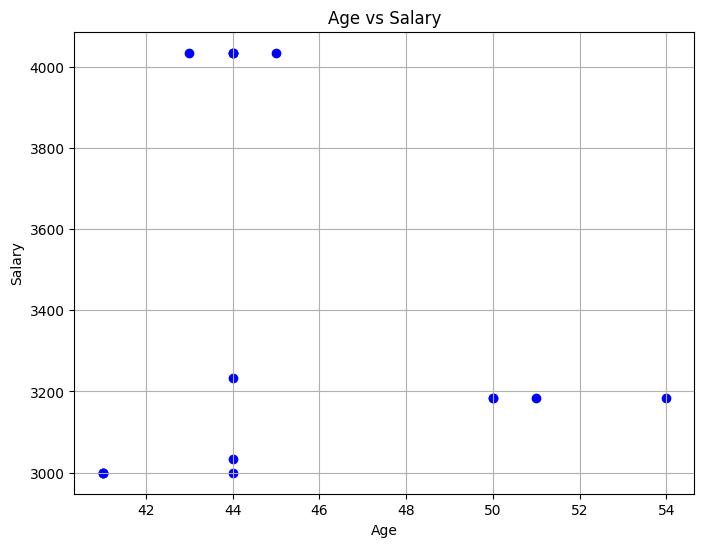

In [35]:
# Plot chart with age and salary
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Age'], filtered_data['Salary'], color='blue')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


In [36]:
# Count the number of people from each place
place_counts = df['Place'].value_counts()
place_counts

Place
Mumbai        51
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

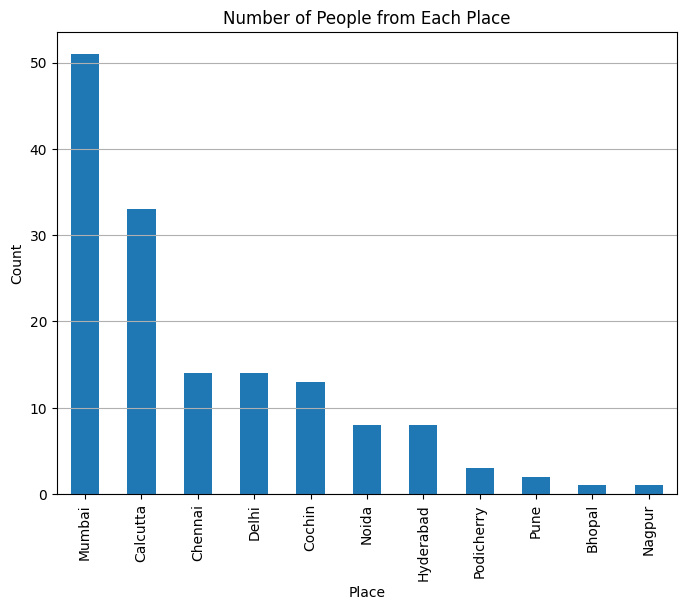

In [37]:
plt.figure(figsize=(8, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [39]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


In [40]:
#Data Encoding
# Perform one-hot encoding for categorical variables
encoded_df = pd.get_dummies(df, columns=['Company', 'Place','Country'])
encoded_df

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5312.467742,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
144,22.0,8787.000000,1,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.000000,1,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
# Initialize StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [50]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Age', 'Salary', 'Gender'], dtype='object')

In [63]:
columns_to_scale =['Age', 'Salary', 'Gender']

In [64]:
# Perform Standard Scaling
encoded_df[columns_to_scale] = scaler_standard.fit_transform(encoded_df[columns_to_scale])

In [65]:
# Perform Min-Max Scaling
encoded_df[columns_to_scale] = scaler_minmax.fit_transform(encoded_df[columns_to_scale])

In [66]:
# Display the scaled dataframe
print("Scaled DataFrame:")
print(encoded_df.head())

Scaled DataFrame:
        Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0  0.370370  0.480650     0.0        False               False   
1  0.555556  0.480650     0.0        False               False   
2  0.648148  0.137817     0.0        False               False   
3  0.740741  0.217480     0.0        False               False   
4  0.425926  0.331285     0.0        False               False   

   Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0            False                    False         True   
1             True                    False        False   
2            False                    False         True   
3             True                    False        False   
4            False                    False         True   

   Company_Tata Consultancy Services  Place_Bhopal  ...  Place_Chennai  \
0                              False         False  ...           True   
1                              False         False  ...          False   
2 